# CUSTOMER SEGMENTATION(K_MEANS CLUSTERING)

### load the data and check for missing values

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Mall_Customers.csv")

# Rename columns (remove spaces)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']
print("Missing values:\n", df.isnull().sum())
print(df.head())
print(df.info())

Missing values:
 CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64
   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


### K_Means(Elbow Graph)

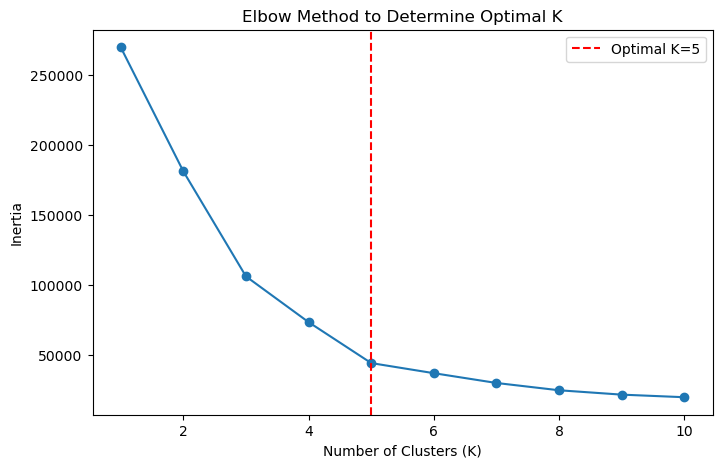

In [63]:
#supress warning if needed
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.cluster import KMeans
import numpy as np

# Select relevant columns for clustering
X = df[['Annual_Income', 'Spending_Score']]

# Find the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.axvline(x=5, linestyle="--", color="red", label="Optimal K=5")
plt.legend()
plt.show()



### K_Means with K=5

In [69]:
#supress warning if needed
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df[['Annual_Income', 'Spending_Score']])

# View first few rows with assigned clusters
print(df[['Annual_Income', 'Spending_Score', 'Cluster']].head())

# Check cluster centers
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual_Income', 'Spending_Score'])
print("Cluster Centers:\n", centers_df.round(2))

# cluster count
cluster_counts = df['Cluster'].value_counts().sort_index()
print("\nCustomer Count in Each Cluster:\n", cluster_counts)

   Annual_Income  Spending_Score  Cluster
0             15              39        4
1             15              81        2
2             16               6        4
3             16              77        2
4             17              40        4
Cluster Centers:
    Annual_Income  Spending_Score
0          55.30           49.52
1          86.54           82.13
2          25.73           79.36
3          88.20           17.11
4          26.30           20.91

Customer Count in Each Cluster:
 Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


### Scatter plot for clusters

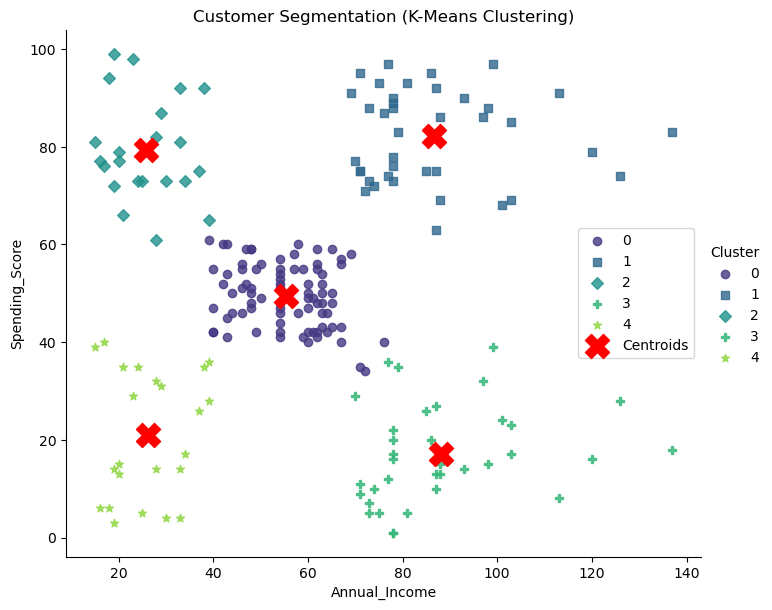

In [75]:
# Scatter plot for clusters
sns.lmplot(data=df, x="Annual_Income", y="Spending_Score", hue="Cluster",
           palette="viridis", fit_reg=False, height=6, aspect=1.2, markers=["o", "s", "D", "P", "*"])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.legend()
plt.show()


In [22]:
def summary_report():
    report = """
     Project: Customer Segmentation using K-Means Clustering
    - Goal: Identify different customer groups based on spending behavior.
    - Dataset: Mall Customer Segmentation (200 customers)
    - Optimal Clusters: K = 5 (Elbow Method)
    - Findings:
        - High-income, high-spending customers
        - High-income, low-spending customers
        - Low-income, high-spending customers
        - Low-income, low-spending customers
        - Middle-income, balanced spending
    - Business Insights:
        - Target high-spending customers with premium services.
        - Improve engagement for high-income but low-spending groups.
        - Offer personalized discounts for different customer types.
    """
    print(report)

summary_report()


     Project: Customer Segmentation using K-Means Clustering
    - Goal: Identify different customer groups based on spending behavior.
    - Dataset: Mall Customer Segmentation (200 customers)
    - Optimal Clusters: K = 5 (Elbow Method)
    - Findings:
        - High-income, high-spending customers
        - High-income, low-spending customers
        - Low-income, high-spending customers
        - Low-income, low-spending customers
        - Middle-income, balanced spending
    - Business Insights:
        - Target high-spending customers with premium services.
        - Improve engagement for high-income but low-spending groups.
        - Offer personalized discounts for different customer types.
    
